In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import autolens as al
import os
import emcee
import itertools
marker = itertools.cycle(('.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d'))
error_marker = itertools.cycle(('o','v','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d'))

results_path = './output/'

In [2]:
def find(name, path):
    for root, dirs, files in os.walk(path):
        if name in files:
            return os.path.join(root, name)

In [3]:
modelized_metadata = pd.read_csv('modelized_systems.csv')
modelized_metadata.head()

,Unnamed: 0,index,OBJID-g,H0-g,Om0-g,exposure_time-g,numPix-g,pixel_scale-g,psf_type-g,read_noise-g,...,PLANE_1-REDSHIFT-g,PLANE_2-REDSHIFT-g,PLANE_1-REDSHIFT-r,PLANE_2-REDSHIFT-r,PLANE_1-REDSHIFT-i,PLANE_2-REDSHIFT-i,PLANE_1-REDSHIFT-z,PLANE_2-REDSHIFT-z,PLANE_1-REDSHIFT-Y,PLANE_2-REDSHIFT-Y
0,0,1501,1502,73.0,0.3,90.0,100,0.263,GAUSSIAN,7,...,0.935053,3.726231,0.935053,3.726231,0.935053,3.726231,0.935053,3.726231,0.935053,3.726231
1,1,705,706,73.0,0.3,90.0,100,0.263,GAUSSIAN,7,...,0.339738,4.820473,0.339738,4.820473,0.339738,4.820473,0.339738,4.820473,0.339738,4.820473
2,2,106,107,73.0,0.3,90.0,100,0.263,GAUSSIAN,7,...,0.858379,2.855011,0.858379,2.855011,0.858379,2.855011,0.858379,2.855011,0.858379,2.855011
3,3,2464,2465,73.0,0.3,90.0,100,0.263,GAUSSIAN,7,...,0.726914,4.242360,0.726914,4.242360,0.726914,4.242360,0.726914,4.242360,0.726914,4.242360
4,4,915,916,73.0,0.3,90.0,100,0.263,GAUSSIAN,7,...,0.375647,1.763864,0.375647,1.763864,0.375647,1.763864,0.375647,1.763864,0.375647,1.763864


In [4]:
# with prior

column_names=['galaxies_source_bulge_einstein_centre_0',
              'galaxies_source_bulge_einstein_centre_1',
              'galaxies_source_bulge_elliptical_comps_0',
              'galaxies_source_bulge_elliptical_comps_1',
              'galaxies_source_bulge_intensity',
              'galaxies_source_bulge_mass_to_light_ratio',
              'galaxies_lens_mass_centre_0',
              'galaxies_lens_mass_centre_1',
              'galaxies_lens_mass_elliptical_comps_0',
              'galaxies_lens_mass_elliptical_comps_1',
              'galaxies_lens_mass_einstein_radius',
              'galaxies_source_bulge_sersic_index',
              'galaxies_source_bulge_effective_radius']
'''
# no prior
column_names=['galaxies_source_bulge_einstein_centre_0',
              'galaxies_source_bulge_einstein_centre_1',
              'galaxies_source_bulge_elliptical_comps_0',
              'galaxies_source_bulge_elliptical_comps_1',
              'galaxies_source_bulge_intensity',
              'galaxies_source_bulge_effective_radius',
               'galaxies_source_bulge_sersic_index',
              'galaxies_source_bulge_mass_to_light_ratio',
              'galaxies_lens_mass_centre_0',
              'galaxies_lens_mass_centre_1',
              'galaxies_lens_mass_elliptical_comps_0',
              'galaxies_lens_mass_elliptical_comps_1',
              'galaxies_lens_mass_einstein_radius']
'''

"\n# no prior\ncolumn_names=['galaxies_source_bulge_einstein_centre_0',\n              'galaxies_source_bulge_einstein_centre_1',\n              'galaxies_source_bulge_elliptical_comps_0',\n              'galaxies_source_bulge_elliptical_comps_1',\n              'galaxies_source_bulge_intensity',\n              'galaxies_source_bulge_effective_radius',\n               'galaxies_source_bulge_sersic_index',\n              'galaxies_source_bulge_mass_to_light_ratio',\n              'galaxies_lens_mass_centre_0',\n              'galaxies_lens_mass_centre_1',\n              'galaxies_lens_mass_elliptical_comps_0',\n              'galaxies_lens_mass_elliptical_comps_1',\n              'galaxies_lens_mass_einstein_radius']\n"

In [5]:
N_sys=19

einstein_radius = []
bulge_index = []
bulge_e_radius = []
for i in range(0, N_sys):
    samples_path=find('emcee.hdf', results_path+str(i)+'_lens_light_step_1') 
    samples=emcee.backends.HDFBackend(samples_path, read_only=True)
    result_dataframe = pd.DataFrame(samples.get_chain(flat=True), columns=column_names)
    #print(samples_path)
    #samples=pd.read_pickle(samples_path)
    #result_dataframe = pd.DataFrame(samples.results_internal.samples, columns=np.array([list(row) for row in samples.names]).flatten())
    print(np.percentile(result_dataframe['galaxies_lens_mass_einstein_radius'][int(len(result_dataframe['galaxies_lens_mass_einstein_radius'])*0.3):], [15.85, 50., 84.05]))
    einstein_radius.append(np.percentile(result_dataframe['galaxies_lens_mass_einstein_radius'][int(len(result_dataframe['galaxies_lens_mass_einstein_radius'])*0.3):], [15.85, 50., 84.05]))
    bulge_index.append(np.percentile(result_dataframe['galaxies_source_bulge_sersic_index'][int(len(result_dataframe['galaxies_source_bulge_sersic_index'])*0.3):], [15.85, 50., 84.05]))
    bulge_e_radius.append(np.percentile(result_dataframe['galaxies_source_bulge_effective_radius'][int(len(result_dataframe['galaxies_source_bulge_effective_radius'])*0.3):], [15.85, 50., 84.05]))

[2.64007402 2.64885392 2.65008419]
[3.09526554 3.16331049 3.2874006 ]
[3.38214024 3.61077575 3.69892167]
[2.79985479 2.80643036 2.81116255]
[4.83291583 4.85557524 4.92630842]
[2.97671948 3.47166407 3.59162611]
[3.49183766 3.5021935  3.52015832]
[2.61175095 2.64413266 2.67182807]
[1.98762724 1.98943763 1.99334515]
[4.56586535 4.75584732 4.96759268]
[4.5064246  4.93791532 4.97407919]
[4.67343308 4.69195561 4.702216  ]
[6.78035974 7.17540826 7.20190575]
[4.66123567 4.69677758 4.90123681]
[4.83852461 4.86527646 4.880014  ]
[3.72573986 3.73739197 3.74225751]
[3.27992673 3.29005323 3.30127143]
[2.70065787 2.9133083  3.07086528]
[4.6083723  4.66784865 4.67891113]


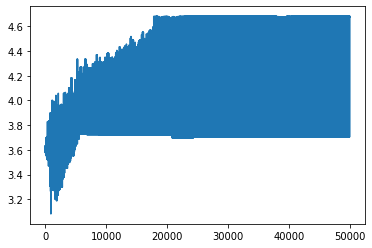

In [6]:
plt.plot(result_dataframe['galaxies_lens_mass_einstein_radius'])

In [7]:
variables = ['galaxies_lens_mass_einstein_radius', 'galaxies_source_bulge_sersic_index', 'galaxies_source_bulge_effective_radius']
latex_variables = ['$θ_E$', 'n', '$R_E$']
predicted_variables = [einstein_radius, bulge_index, bulge_e_radius]

In [8]:
len(einstein_radius)

19

In [9]:
actual_variables = []
for i in range(0, len(einstein_radius)):
    actual_variables.append([float(modelized_metadata['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g'][i]), float(modelized_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-n_sersic-g'][i]), float(modelized_metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-R_sersic-g'][i])])
actual_variables = np.array(actual_variables).T

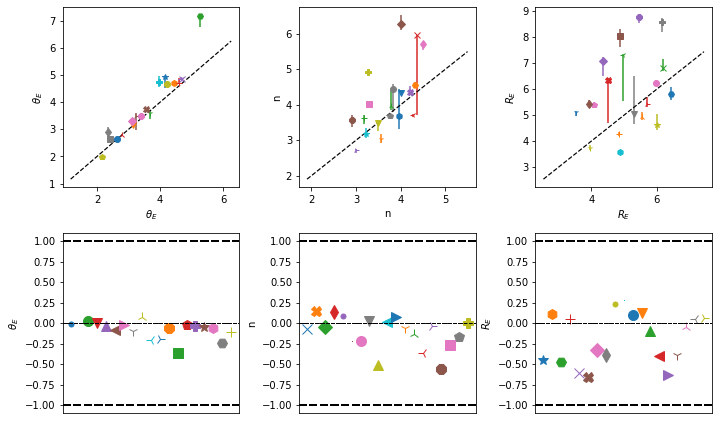

In [10]:
#plt.rcParams.update({"font.size": 13})

fig, ax = plt.subplots(2, 3, figsize=(10, 6))

for k in range(0, len(ax)):
    for j in range(0, len(ax[k])):
        if k==0:
            for i in range(len(einstein_radius)):
                ax[k][j].errorbar(actual_variables[j][i], predicted_variables[j][i][1], yerr=np.array([[predicted_variables[j][i][1]-predicted_variables[j][i][0]], [predicted_variables[j][i][2]-predicted_variables[j][i][1]]]), fmt=next(error_marker))

            ax[k][j].plot(np.linspace(min(actual_variables[j])-1., max(actual_variables[j])+1., 50), np.linspace(min(actual_variables[j])-1., max(actual_variables[j])+1., 50), 'k--', lw=1.2)
            ax[k][j].set_xlabel(latex_variables[j])
            ax[k][j].set_ylabel(latex_variables[j])
            #ax[k][j].set_xlim(min(actual_variables[j])-1., max(actual_variables[j])+1.)
            #ax[k][j].set_ylim(min(actual_variables[j])-1., max(actual_variables[j])+1.)
        else:
            for i in range(len(einstein_radius)):
                ax[k][j].plot(i, (actual_variables[j][i]-predicted_variables[j][i][1])/actual_variables[j][i], marker = next(marker), markersize=10)
                ax[k][j].axhline(y=0, color='k', linestyle='--', lw=1.)
                ax[k][j].axhline(y=-1., color='k', linestyle='--', lw=2.)
                ax[k][j].axhline(y=1., color='k', linestyle='--', lw=2.)
                #ax[k][j].set_ylim(-1.5, 1.5)
                ax[k][j].set_ylabel(latex_variables[j])
                ax[k][j].set_xticks([])
fig.tight_layout()